In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default='plotly_mimetype+notebook'
deaths=pd.read_csv(r'C:\Users\strag\Documents\GitHub\CovidAnalysis4CPDM\PROGETTO\new cases and new death dataframe.csv')
deaths

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
0,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-01,NaN,0,Epidemic intelligence national data,NaN
1,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-02,0.000000,0,Epidemic intelligence national data,NaN
2,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-03,0.000000,0,Epidemic intelligence national data,NaN
3,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-04,0.000000,0,Epidemic intelligence national data,NaN
4,Afghanistan,AFG,Asia,38928341,cases,0.0,2020-05,0.000000,0,Epidemic intelligence national data,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43997,Zimbabwe,ZWE,Africa,14862927,deaths,49.0,2021-50,5.180675,4787,Epidemic intelligence national data,NaN
43998,Zimbabwe,ZWE,Africa,14862927,deaths,NaN,2021-52,16.483967,5032,Epidemic intelligence national data,NaN
43999,Zimbabwe,ZWE,Africa,14862927,deaths,128.0,2022-01,NaN,5160,Epidemic intelligence national data,NaN
44000,Zimbabwe,ZWE,Africa,14862927,deaths,87.0,2022-02,14.465522,5247,Epidemic intelligence national data,NaN


In [2]:
deaths.country_code.unique()

array(['AFG', nan, 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH',
       'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR',
       'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'SWZ', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF',
       'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD',
       'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'VAT', 'HND',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR',
       'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'XKX', 'KWT',
       'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU',
       'LUX', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT',
       'MUS', '

In [3]:
#SELECT DATA ONLY FOR ITALY
deaths_italy=deaths[deaths.country=='Italy']
deaths_italy.drop(['country_code','continent', 'rate_14_day'], axis=1, inplace=True)
deaths_italy[['Year', 'Week']]=deaths_italy['year_week'].str.split('-', expand=True)

C:\Users\strag\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\strag\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
only_cases=deaths_italy[deaths_italy.indicator=='cases']
table_cases=only_cases.pivot_table(index='year_week', columns='indicator', values='weekly_count')
table_cases

indicator,cases
year_week,
2020-01,0.0
2020-02,0.0
2020-03,0.0
2020-04,0.0
2020-05,2.0
...,...
2021-51,293877.0
2021-52,778661.0
2022-01,1098476.0


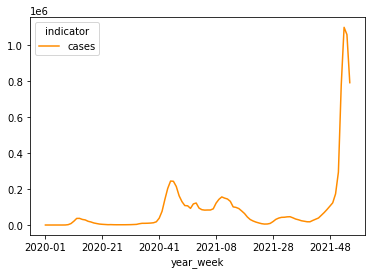

In [5]:
#GRAFICO DEI CASI DI POSITIVITA' DAL 2020 AL 2022
#matplotlib.colors
#matplotlib.colors.rgb_to_hsv
#matplotlib.colors.to_rgba
#matplotlib.figure.Figure.get_size_inches
#matplotlib.figure.Figure.subplots_adjust
#matplotlib.axes.Axes.text
#matplotlib.axes.Axes.hlines
table_cases.plot(kind='line', color='darkorange')
plt.savefig('Positive cases per week', dpi=300, bbox_inches='tight')
plt.show()

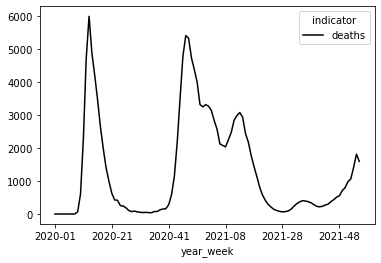

In [6]:
#GRAFICO DELLE MORTI DAL 2020 AL 2022
only_deaths=deaths_italy[deaths_italy.indicator=='deaths']
table_deaths=only_deaths.pivot_table(index='year_week', columns='indicator', values='weekly_count')
table_deaths.plot(kind='line', color='black')
plt.savefig('Number of deaths per week', dpi=300, bbox_inches='tight')
plt.show()

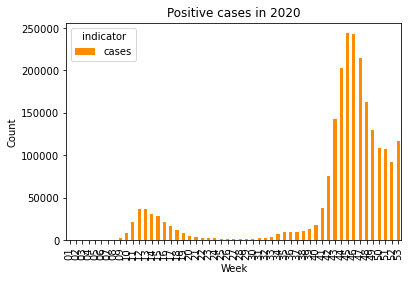

In [26]:
#GRAFICI PER CIASCUN ANNO
only_cases_2020=only_cases[only_cases.Year=='2020']
table_cases_2020=only_cases_2020.pivot_table(index='Week', columns='indicator', values='weekly_count')
#plt.figure(figsize=(5, 2.7), layout='constrained')
ax=table_cases_2020.plot(kind='bar', color='darkorange', title='Positive cases in 2020')
ax.set(xlabel='Week', ylabel='Count')
plt.savefig('Cases per week in Italy 2020', dpi=300, bbox_inches='tight')
plt.show()